CS302 Lab 9: **Heat Diffusion**

Group Members: Vishal Patel (201801436) and Dhruv Bhimani (201801448)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML 
from math import *

In [ ]:
AMBIENT=25
HOT=50
COLD=0

### Implementation of Functions 
diffusion, applyHotCold, initBar

In [ ]:
def diffusion(diffusionRate, site, N, NE, E, SE, S, SW, W, NW):
  return (1 - 8*diffusionRate)*site+ diffusionRate*(N + NE + E + SE + S + SW + W + NW)

In [ ]:
def applyHotCold(bar,hotSites,coldSites):
  for k in range(len(hotSites)):
        bar[hotSites[k, 0], hotSites[k, 1]] = HOT
  for k in range(len(coldSites)):
        bar[coldSites[k, 0], coldSites[k, 1]] = COLD
  return bar

In [ ]:
def initBar(m,n,hotSites,coldSites):
  ambientBar = AMBIENT * np.ones((m, n))
  bar = applyHotCold(ambientBar, hotSites, coldSites)
  return bar

### Implementation of Functions for Boundary Condition

Absorbing, Periodic, Reflecting


In [ ]:
#ABSORBING BOUNDARY CONDITIONS
def absorbingLat(a,m,n):
  a = np.insert(a, 0, AMBIENT, axis=0)
  a = np.insert(a, m+1, AMBIENT, axis=0)
  a = np.insert(a, 0, AMBIENT, axis=1)
  a = np.insert(a, n+1, AMBIENT, axis=1)
  return a

In [ ]:
#Periodic Boundary Conditions
def periodicLat(a,m,n):
  a = np.insert(a, 0, AMBIENT, axis=0)
  a = np.insert(a, m+1, AMBIENT, axis=0)
  a = np.insert(a, 0, AMBIENT, axis=1)
  a = np.insert(a, n+1, AMBIENT, axis=1)
  for i in range(1,m+1):
    a[i][0]=a[i][n]
  for i in range(1,m+1):
    a[i][n+1]=a[i][1]
  for j in range(1,n+1):
    a[0][j]=a[m][j]
  for j in range(1,n+1):
    a[m+1][j]=a[1][j]
  a[0][0]=a[m][0]
  a[0][n+1]=a[0][1]
  a[m+1][n+1]=a[1][n+1]
  a[m+1][0]=a[m+1][n]
  return a

In [ ]:
#REFLECTING BOUNDARY CONDITIONS
def reflectingLat(lat):
    latNS = np.row_stack((lat[0], lat, lat[-1]))
    return np.column_stack((latNS[:,0], latNS, latNS[:,-1]))

### functions
applyDiffusionExtended, diffusionSim

In [ ]:
def applyDiffusionExtended(diffusionRate, lat):
    m = lat.shape[0] - 2
    n = lat.shape[1] - 2
    new = np.zeros((m, n))    
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            new[i - 1, j - 1] = diffusion(diffusionRate, lat[i,j], lat[i-1,j-1], lat[i-1,j], lat[i-1,j+1], lat[i,j-1], lat[i,j+1], lat[i+1,j-1], lat[i+1,j], lat[i+1,j+1]);
    
    return new

In [ ]:
def  diffusionSim(m, n, diffusionRate, hotSites, coldSites, t):
    bar = initBar(m, n, hotSites, coldSites)

    grids = np.zeros((t + 1, m, n))
    grids[0, :, :] = bar
    for i in range(1, t + 1):
        barExtended = reflectingLat(bar)
        bar = applyDiffusionExtended(diffusionRate, barExtended)
        bar = applyHotCold(bar, hotSites, coldSites)
        grids[i, :, :] = bar
    return grids

### DIFFUSION WITH REFLECTING BOUNDARY CONDITIONS

### Constant Value=25

In [ ]:
#Reflecting Boundary Conditions
AMBIENT=25
m = 10
n = 30
diffusionRate = 0.125
hotSites = np.array([[floor(m/2),0],[floor(m/2)+1,0],[floor(m/2)+2,0],[0,floor(m/2)]])
coldSites = np.array([[m-1,floor(n/3)-2],[m-1,floor(n/3)-1],[m-1,floor(n/3)],[m-1,floor(n/3)+1],[m-1,floor(n/3)+2]])
t = 100

grids = diffusionSim(m, n, diffusionRate, hotSites, coldSites, t)


In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

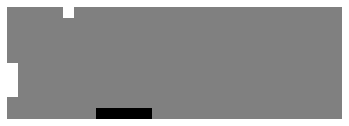

In [ ]:
#initial grid

figGray = plt.figure()
plt.axis('off')
imGray = plt.imshow(grids[0,:,:], cmap='gray', interpolation='nearest', animated=True)


In [ ]:
def updatefig(i, *args):
    global grids
    imGray.set_array(grids[i,:,:])
    return imGray,

grid_ani = animation.FuncAnimation(figGray, updatefig, save_count = len(grids), interval=50, blit=False)
plt.show()
 
grid_ani.save('DiffusionGray.mp4', writer=writer)

HTML(grid_ani.to_html5_video())

### Diffusion with Reflecting Boundary Conditions

### Constant Value = 0

In [ ]:
AMBIENT=0

In [ ]:
#Reflecting Boundary Conditions

m = 10
n = 30
diffusionRate = 0.125
hotSites = np.array([[floor(m/2),0],[floor(m/2)+1,0],[floor(m/2)+2,0],[0,floor(m/2)]])
coldSites = np.array([[m-1,floor(n/3)-2],[m-1,floor(n/3)-1],[m-1,floor(n/3)],[m-1,floor(n/3)+1],[m-1,floor(n/3)+2]])
t = 100

grids = diffusionSim(m, n, diffusionRate, hotSites, coldSites, t)


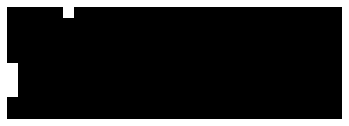

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

figGray = plt.figure()
plt.axis('off')
imGray = plt.imshow(grids[0,:,:], cmap='gray', interpolation='nearest', animated=True)

def updatefig(i, *args):
    global grids
    imGray.set_array(grids[i,:,:])
    return imGray,

grid_ani = animation.FuncAnimation(figGray, updatefig, save_count = len(grids), interval=50, blit=False)
plt.show()
 
grid_ani.save('DiffusionGray.mp4', writer=writer)

HTML(grid_ani.to_html5_video())

### Diffusion with Reflecting Boundary Conditions

### Constant Value = 50

In [ ]:
#Reflecting Boundary Conditions

AMBIENT=50
m = 10
n = 30
diffusionRate = 0.125
hotSites = np.array([[floor(m/2),0],[floor(m/2)+1,0],[floor(m/2)+2,0],[0,floor(m/2)]])
coldSites = np.array([[m-1,floor(n/3)-2],[m-1,floor(n/3)-1],[m-1,floor(n/3)],[m-1,floor(n/3)+1],[m-1,floor(n/3)+2]])
t = 100

grids = diffusionSim(m, n, diffusionRate, hotSites, coldSites, t)


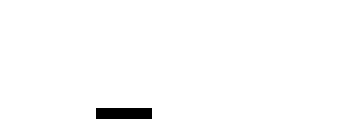

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

figGray = plt.figure()
plt.axis('off')
imGray = plt.imshow(grids[0,:,:], cmap='gray', interpolation='nearest', animated=True)

def updatefig(i, *args):
    global grids
    imGray.set_array(grids[i,:,:])
    return imGray,

grid_ani = animation.FuncAnimation(figGray, updatefig, save_count = len(grids), interval=50, blit=False)
plt.show()
 
grid_ani.save('DiffusionGray.mp4', writer=writer)

HTML(grid_ani.to_html5_video())

### DIFFUSION WITH ABSORBING BOUNDARY CONDITIONS

In [ ]:
def  diffusionSimAbsorbing(m, n, diffusionRate, hotSites, coldSites, t):
    bar = initBar(m, n, hotSites, coldSites)

    grids = np.zeros((t + 1, m, n))
    grids[0, :, :] = bar
    for i in range(1, t + 1):
        barExtended = absorbingLat(bar,m,n)
        bar = applyDiffusionExtended(diffusionRate, barExtended)
        bar = applyHotCold(bar, hotSites, coldSites)
        grids[i, :, :] = bar
    return grids

In [ ]:
#Absorbing Boundary Conditions
AMBIENT=25
m = 10
n = 30
diffusionRate = 0.125
hotSites = np.array([[floor(m/2),0],[floor(m/2)+1,0],[floor(m/2)+2,0],[0,floor(m/2)]])
coldSites = np.array([[m-1,floor(n/3)-2],[m-1,floor(n/3)-1],[m-1,floor(n/3)],[m-1,floor(n/3)+1],[m-1,floor(n/3)+2]])
t = 100

grids = diffusionSimAbsorbing(m, n, diffusionRate, hotSites, coldSites, t)


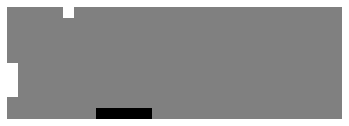

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

figGray = plt.figure()
plt.axis('off')
imGray = plt.imshow(grids[0,:,:], cmap='gray', interpolation='nearest', animated=True)

def updatefig(i, *args):
    global grids
    imGray.set_array(grids[i,:,:])
    return imGray,

grid_ani = animation.FuncAnimation(figGray, updatefig, save_count = len(grids), interval=50, blit=False)
plt.show()
 
grid_ani.save('DiffusionGray.mp4', writer=writer)

HTML(grid_ani.to_html5_video())

### Diffusion With Periodic Boundary Conditions

In [ ]:
def  diffusionSimPeriodic(m, n, diffusionRate, hotSites, coldSites, t):
    bar = initBar(m, n, hotSites, coldSites)

    grids = np.zeros((t + 1, m, n))
    grids[0, :, :] = bar
    for i in range(1, t + 1):
        barExtended = periodicLat(bar,m,n)
        bar = applyDiffusionExtended(diffusionRate, barExtended)
        bar = applyHotCold(bar, hotSites, coldSites)
        grids[i, :, :] = bar
    return grids

In [ ]:
#Absorbing Boundary Conditions
AMBIENT=25
m = 10
n = 30
diffusionRate = 0.125
hotSites = np.array([[floor(m/2),0],[floor(m/2)+1,0],[floor(m/2)+2,0],[0,floor(m/2)]])
coldSites = np.array([[m-1,floor(n/3)-2],[m-1,floor(n/3)-1],[m-1,floor(n/3)],[m-1,floor(n/3)+1],[m-1,floor(n/3)+2]])
t = 100


grids = diffusionSimPeriodic(m, n, diffusionRate, hotSites, coldSites, t)


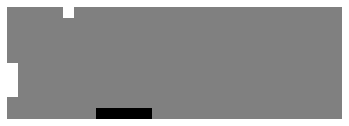

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

figGray = plt.figure()
plt.axis('off')
imGray = plt.imshow(grids[0,:,:], cmap='gray', interpolation='nearest', animated=True)

def updatefig(i, *args):
    global grids
    imGray.set_array(grids[i,:,:])
    return imGray,

grid_ani = animation.FuncAnimation(figGray, updatefig, save_count = len(grids), interval=50, blit=False)
plt.show()
 
grid_ani.save('DiffusionGray.mp4', writer=writer)

HTML(grid_ani.to_html5_video())

### Using Table 10.2.13 for Diffusion 

In [ ]:
def diffusion2(diffusionRate, site, N, NE, E, SE, S, SW, W, NW):
  ans=(0.25*site)+(0.125*(N+S+E+W))+(0.0625*(NE+SE+SW+NW))
  return ans

In [ ]:
def applyDiffusionExtended2(diffusionRate, lat):
    m = lat.shape[0] - 2
    n = lat.shape[1] - 2
    new = np.zeros((m, n))    
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            new[i - 1, j - 1] = diffusion2(diffusionRate, lat[i,j], lat[i-1,j-1], lat[i-1,j], lat[i-1,j+1], lat[i,j-1], lat[i,j+1], lat[i+1,j-1], lat[i+1,j], lat[i+1,j+1]);
    
    return new

In [ ]:
def  diffusionSim2(m, n, diffusionRate, hotSites, coldSites, t):
    bar = initBar(m, n, hotSites, coldSites)

    grids = np.zeros((t + 1, m, n))
    grids[0, :, :] = bar
    for i in range(1, t + 1):
        barExtended = reflectingLat(bar)
        bar = applyDiffusionExtended(diffusionRate, barExtended)
        bar = applyHotCold(bar, hotSites, coldSites)
        grids[i, :, :] = bar
    return grids

In [ ]:
#Reflecting Boundary Conditions

m = 10
n = 30
diffusionRate = 0.125
hotSites = np.array([[floor(m/2),0],[floor(m/2)+1,0],[floor(m/2)+2,0],[0,floor(m/2)]])
coldSites = np.array([[m-1,floor(n/3)-2],[m-1,floor(n/3)-1],[m-1,floor(n/3)],[m-1,floor(n/3)+1],[m-1,floor(n/3)+2]])
t = 100

grids = diffusionSim2(m, n, diffusionRate, hotSites, coldSites, t)


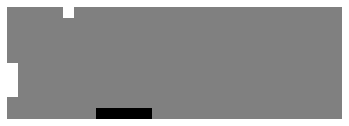

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

figGray = plt.figure()
plt.axis('off')
imGray = plt.imshow(grids[0,:,:], cmap='gray', interpolation='nearest', animated=True)

def updatefig(i, *args):
    global grids
    imGray.set_array(grids[i,:,:])
    return imGray,

grid_ani = animation.FuncAnimation(figGray, updatefig, save_count = len(grids), interval=50, blit=False)
plt.show()
 
grid_ani.save('DiffusionGray.mp4', writer=writer)

HTML(grid_ani.to_html5_video())

### Bar at temp 100 with constant application of 25 at boundary

In [ ]:
def initBar2(m,n,temp):
  ambientBar = temp * np.ones((m, n))
  #bar = applyHotCold(ambientBar, hotSites, coldSites)
  return ambientBar

In [ ]:
def boundary(a,m,n):
  a = np.insert(a, 0, AMBIENT, axis=0)
  a = np.insert(a, m+1, AMBIENT, axis=0)
  a = np.insert(a, 0, AMBIENT, axis=1)
  a = np.insert(a, n+1, AMBIENT, axis=1)
  return a

In [ ]:
def  diffusionSimExtra(m, n, diffusionRate, t,temp):
    bar = initBar2(m, n, temp)

    grids = np.zeros((t + 1, m, n))
    grids[0, :, :] = bar
    for i in range(1, t + 1):
        barExtended = boundary(bar,m,n)
        bar = applyDiffusionExtended(diffusionRate, barExtended)
        grids[i, :, :] = bar
    return grids

In [ ]:
#Reflecting Boundary Conditions
AMBIENT=25
m = 10
n = 30
diffusionRate = 0.125

t = 100

grids = diffusionSimExtra(m, n, diffusionRate, t,100)


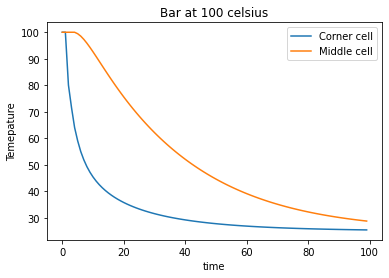

In [ ]:
corner=[]
middle=[]
for i in range(t):
  corner.append(grids[i,1,1])
  middle.append(grids[i,5,15])
t1=np.arange(0,t,1)
plt.title('Bar at 100 celsius')
plt.xlabel('time')
plt.ylabel('Temepature')
plt.plot(t1,corner)
plt.plot(t1,middle)
plt.legend(['Corner cell','Middle cell'])

In [ ]:
#Reflecting Boundary Conditions
AMBIENT=25
m = 10
n = 30
diffusionRate = 0.125

t = 100

grids = diffusionSimExtra(m, n, diffusionRate, t,-50)


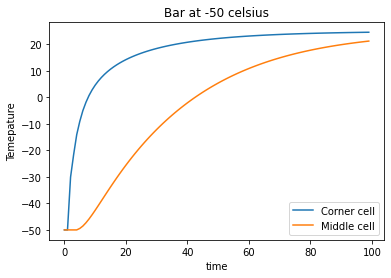

In [ ]:
corner=[]
middle=[]
for i in range(t):
  corner.append(grids[i,1,1])
  middle.append(grids[i,5,15])
t1=np.arange(0,t,1)
plt.title('Bar at -50 celsius')
plt.xlabel('time')
plt.ylabel('Temepature')
plt.plot(t1,corner)
plt.plot(t1,middle)
plt.legend(['Corner cell','Middle cell'])